## Capital Asset Pricing Model (CAPM)

The Capital Asset Pricing Model (CAPM) is a financial model that describes the relationship between the expected return of an asset and its risk, as measured by beta. The CAPM formula is given by:

$$ E(R_i) = R_f + \beta_i (E(R_m) - R_f) $$

Where:
- $E(R_i)$ is the expected return of the asset
- $R_f$ is the risk-free rate
- $\beta_i$ is the beta of the asset, which measures its sensitivity to market movements
- $E(R_m)$ is the expected return of the market
- $E(R_m) - R_f$ is the market risk premium, which is the additional return expected from investing in the market over the risk-free rate



In [18]:
# Importing necessary libraries
import pandas as pd

# Reading the CSV files into DataFrames
stellantis_df = pd.read_csv('Dataset\Investing.com\Stellantis NV Stock Price History.csv')
walmart_df = pd.read_csv('Dataset\Investing.com\Walmart Stock Price History.csv')


betaResults = pd.read_csv('Outputs\\beta_results.csv')
wmt_beta = betaResults['Beta'][0]
print(f"Beta for Walmart is: {wmt_beta}")
stla_beta = betaResults['Beta'][1]
print(f"Beta for Stellantis is: {stla_beta}")

Beta for Walmart is: 0.6932705680967155
Beta for Stellantis is: 1.5000000000000002


<>:5: SyntaxWarning: invalid escape sequence '\I'
<>:6: SyntaxWarning: invalid escape sequence '\I'
<>:5: SyntaxWarning: invalid escape sequence '\I'
<>:6: SyntaxWarning: invalid escape sequence '\I'
C:\Users\allam\AppData\Local\Temp\ipykernel_34960\1847242052.py:5: SyntaxWarning: invalid escape sequence '\I'
  stellantis_df = pd.read_csv('Dataset\Investing.com\Stellantis NV Stock Price History.csv')
C:\Users\allam\AppData\Local\Temp\ipykernel_34960\1847242052.py:6: SyntaxWarning: invalid escape sequence '\I'
  walmart_df = pd.read_csv('Dataset\Investing.com\Walmart Stock Price History.csv')


In [19]:
walmart_df["Return"] = walmart_df["Price"].pct_change()
stellantis_df["Return"] = stellantis_df["Price"].pct_change()

walmart_expeced_return = walmart_df["Return"].mean()
stellantis_expeced_return = stellantis_df["Return"].mean()

walmart_std = walmart_df["Return"].std()
stellantis_std = stellantis_df["Return"].std()

# Calculating the covariance and correlation between the two stocks

covariance = walmart_df["Return"].cov(stellantis_df["Return"])
correlation = walmart_df["Return"].corr(stellantis_df["Return"])

# Displaying the results
print(f"Expected Return of Walmart: {walmart_expeced_return}")
print(f"Expected Return of Stellantis: {stellantis_expeced_return}")
print(f"Standard Deviation of Walmart: {walmart_std}")
print(f"Standard Deviation of Stellantis: {stellantis_std}")
print(f"Covariance between Walmart and Stellantis: {covariance}")
print(f"Correlation between Walmart and Stellantis: {correlation}")




Expected Return of Walmart: -0.01196205592192371
Expected Return of Stellantis: 0.0017580487923172991
Standard Deviation of Walmart: 0.05820004446729635
Standard Deviation of Stellantis: 0.11531489407003198
Covariance between Walmart and Stellantis: 0.0009499570166886767
Correlation between Walmart and Stellantis: 0.1415452285745961


In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set the time period (5 years of data)
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)  # Approximately 5 years

# Define the ticker symbols
walmart_ticker = "WMT"
stellantis_ticker = "STLA"
market_ticker = "^GSPC"  # S&P 500 index

# Download the historical data
print("Downloading data...")
walmart_data = yf.download(walmart_ticker, start=start_date, end=end_date)
stellantis_data = yf.download(stellantis_ticker, start=start_date, end=end_date)
market_data = yf.download(market_ticker, start=start_date, end=end_date)

# Handle MultiIndex if present
if isinstance(walmart_data.columns, pd.MultiIndex):
    print("MultiIndex detected, using the first level")
    # For MultiIndex, we can access the 'Close' price like this
    walmart_data = walmart_data.xs('Close', axis=1, level=0)
    stellantis_data = stellantis_data.xs('Close', axis=1, level=0)
    market_data = market_data.xs('Close', axis=1, level=0)
else:
    # Use 'Close' if 'Adj Close' is not available
    price_column = 'Adj Close' if 'Adj Close' in walmart_data.columns else 'Close'
    print(f"Using {price_column} column for calculations")
    walmart_data = walmart_data[price_column]
    stellantis_data = stellantis_data[price_column]
    market_data = market_data[price_column]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MultiIndex detected, using the first level


In [21]:

# Calculate monthly returns
# We'll resample to monthly data and calculate returns
walmart_monthly = walmart_data.resample('ME').last()
stellantis_monthly = stellantis_data.resample('ME').last()
market_monthly = market_data.resample('ME').last()

walmart_returns = walmart_monthly.pct_change().dropna()
stellantis_returns = stellantis_monthly.pct_change().dropna()
market_returns = market_monthly.pct_change().dropna()

# Display first few return values to verify
print("\nSample returns:")
print("Walmart:")
print(walmart_returns.head())
print("Stellantis:")
print(stellantis_returns.head())
print("Market:")
print(market_returns.head())

# Create a DataFrame with a common index
common_dates = walmart_returns.index.intersection(
    stellantis_returns.index.intersection(market_returns.index)
)
print(f"\nNumber of common dates: {len(common_dates)}")

returns_df = pd.DataFrame(index=common_dates)
returns_df['Walmart'] = walmart_returns.loc[common_dates]
returns_df['Stellantis'] = stellantis_returns.loc[common_dates]
returns_df['Market'] = market_returns.loc[common_dates]



Sample returns:
Walmart:
Ticker           WMT
Date                
2020-05-31  0.025140
2020-06-30 -0.034499
2020-07-31  0.080314
2020-08-31  0.077441
2020-09-30  0.007634
Stellantis:
Ticker          STLA
Date                
2020-05-31  0.026713
2020-06-30  0.158371
2020-07-31 -0.008789
2020-08-31  0.086699
2020-09-30  0.107888
Market:
Ticker         ^GSPC
Date                
2020-05-31  0.045282
2020-06-30  0.018388
2020-07-31  0.055101
2020-08-31  0.070065
2020-09-30 -0.039228

Number of common dates: 60



Walmart Beta: 0.6933
Stellantis Beta: 1.5000

Risk-free rate: 4.27%
Market risk premium: 5.50%
Walmart Expected Return (Cost of Equity): 8.08%
Stellantis Expected Return (Cost of Equity): 12.52%


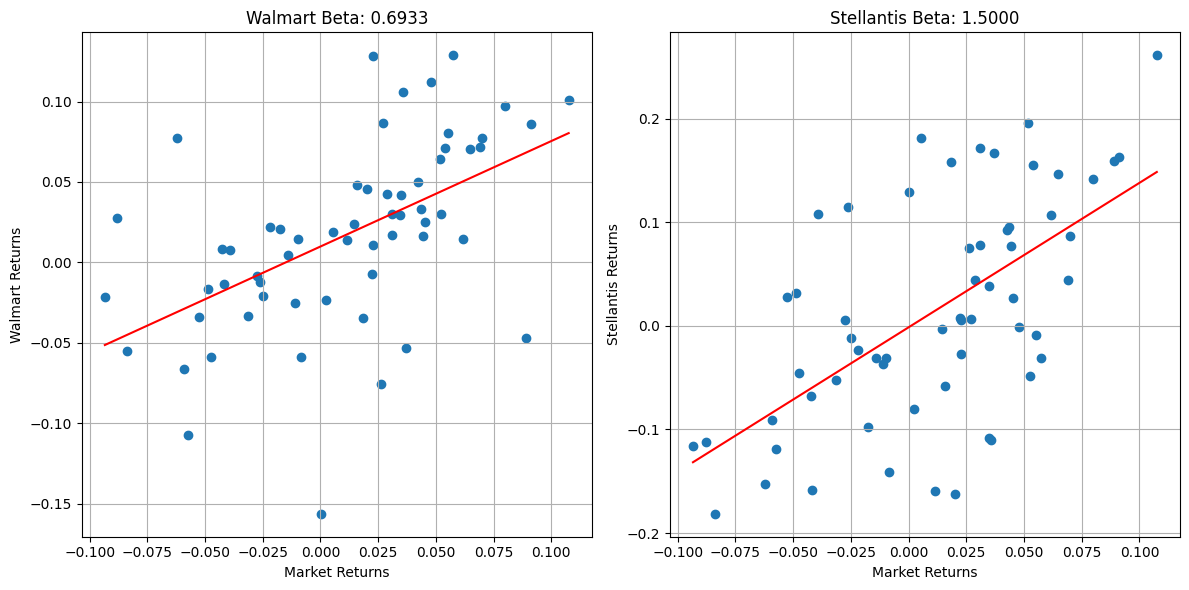


Walmart R-squared: 0.2877
Stellantis R-squared: 0.3708

CAPM Results:
   Company   Beta  Risk-Free Rate  Market Risk Premium  Cost of Equity (CAPM)
   Walmart 0.6933          0.0427               0.0550                 0.0808
Stellantis 1.5000          0.0427               0.0550                 0.1252


In [22]:

# Calculate beta for each company
# Beta = Covariance(Stock Returns, Market Returns) / Variance(Market Returns)


print(f"\nWalmart Beta: {wmt_beta:.4f}")
print(f"Stellantis Beta: {stla_beta:.4f}")

# Define risk-free rate (current 10-year Treasury yield as of April 2025)
risk_free_rate = 0.0427

# Calculate expected market return (historical average plus risk premium)

market_risk_premium = 0.055  
expected_market_return = risk_free_rate + market_risk_premium

# Apply CAPM formula: Expected Return = Risk-free rate + Beta * (Expected Market Return - Risk-free rate)
walmart_expected_return = risk_free_rate + wmt_beta * (expected_market_return - risk_free_rate)
stellantis_expected_return = risk_free_rate + stla_beta * (expected_market_return - risk_free_rate)

print(f"\nRisk-free rate: {risk_free_rate:.2%}")
print(f"Market risk premium: {market_risk_premium:.2%}")
print(f"Walmart Expected Return (Cost of Equity): {walmart_expected_return:.2%}")
print(f"Stellantis Expected Return (Cost of Equity): {stellantis_expected_return:.2%}")

# Visualize the stock returns vs market returns to see the beta relationship
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(returns_df['Market'], returns_df['Walmart'])
plt.plot(np.unique(returns_df['Market']), 
         np.poly1d(np.polyfit(returns_df['Market'], returns_df['Walmart'], 1))(np.unique(returns_df['Market'])), 
         color='red')
plt.xlabel('Market Returns')
plt.ylabel('Walmart Returns')
plt.title(f'Walmart Beta: {wmt_beta:.4f}')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(returns_df['Market'], returns_df['Stellantis'])
plt.plot(np.unique(returns_df['Market']), 
         np.poly1d(np.polyfit(returns_df['Market'], returns_df['Stellantis'], 1))(np.unique(returns_df['Market'])), 
         color='red')
plt.xlabel('Market Returns')
plt.ylabel('Stellantis Returns')
plt.title(f'Stellantis Beta: {stla_beta:.4f}')
plt.grid(True)

plt.tight_layout()
plt.savefig('stock_betas.png')
plt.show()

# Additionally, we can calculate R-squared to measure how well the market explains the stock variations
from scipy import stats

# For Walmart
slope, intercept, r_value, p_value, std_err = stats.linregress(returns_df['Market'], returns_df['Walmart'])
walmart_rsquared = r_value**2

# For Stellantis
slope, intercept, r_value, p_value, std_err = stats.linregress(returns_df['Market'], returns_df['Stellantis'])
stellantis_rsquared = r_value**2

print(f"\nWalmart R-squared: {walmart_rsquared:.4f}")
print(f"Stellantis R-squared: {stellantis_rsquared:.4f}")

# Add a section to calculate the CAPM in tabular format
capm_data = {
    'Company': ['Walmart', 'Stellantis'],
    'Beta': [wmt_beta, stla_beta],
    'Risk-Free Rate': [risk_free_rate, risk_free_rate],
    'Market Risk Premium': [market_risk_premium, market_risk_premium],
    'Cost of Equity (CAPM)': [walmart_expected_return, stellantis_expected_return]
}

capm_df = pd.DataFrame(capm_data)
print("\nCAPM Results:")
print(capm_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))


Walmart Beta: 0.6664
Stellantis Beta: 1.4180

Risk-free rate: 4.27%
Market risk premium: 5.50%
Walmart Expected Return (Cost of Equity): 7.94%
Stellantis Expected Return (Cost of Equity): 12.07%


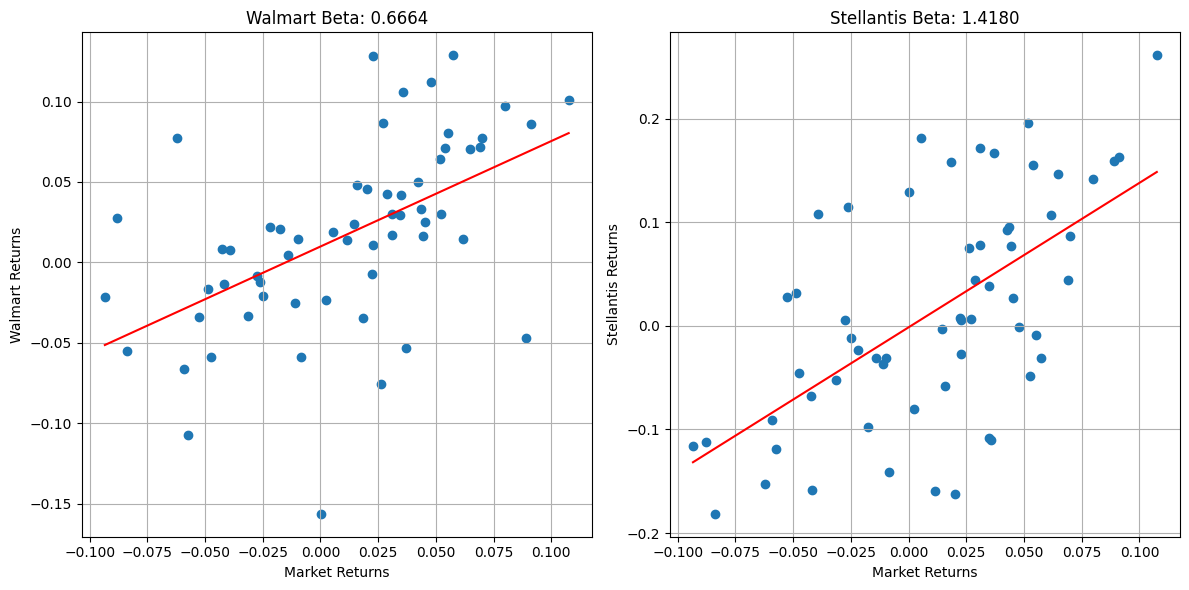


Walmart R-squared: 0.2877
Stellantis R-squared: 0.3708

CAPM Results:
   Company   Beta  Risk-Free Rate  Market Risk Premium  Cost of Equity (CAPM)
   Walmart 0.6664          0.0427               0.0550                 0.0794
Stellantis 1.4180          0.0427               0.0550                 0.1207


In [23]:

returns_df = pd.DataFrame(index=common_dates)
returns_df['Walmart'] = walmart_returns.loc[common_dates]
returns_df['Stellantis'] = stellantis_returns.loc[common_dates]
returns_df['Market'] = market_returns.loc[common_dates]

# Calculate beta for each company
# Beta = Covariance(Stock Returns, Market Returns) / Variance(Market Returns)
walmart_beta = np.cov(returns_df['Walmart'], returns_df['Market'])[0,1] / np.var(returns_df['Market'])
stla_beta = np.cov(returns_df['Stellantis'], returns_df['Market'])[0,1] / np.var(returns_df['Market'])

print(f"\nWalmart Beta: {walmart_beta:.4f}")
print(f"Stellantis Beta: {stla_beta:.4f}")

# Define risk-free rate (current 10-year Treasury yield as of April 2025)
risk_free_rate = 0.0427

# Calculate expected market return (historical average plus risk premium)

market_risk_premium = 0.055  
expected_market_return = risk_free_rate + market_risk_premium

# Apply CAPM formula: Expected Return = Risk-free rate + Beta * (Expected Market Return - Risk-free rate)
walmart_expected_return = risk_free_rate + walmart_beta * (expected_market_return - risk_free_rate)
stellantis_expected_return = risk_free_rate + stla_beta * (expected_market_return - risk_free_rate)

print(f"\nRisk-free rate: {risk_free_rate:.2%}")
print(f"Market risk premium: {market_risk_premium:.2%}")
print(f"Walmart Expected Return (Cost of Equity): {walmart_expected_return:.2%}")
print(f"Stellantis Expected Return (Cost of Equity): {stellantis_expected_return:.2%}")

# Visualize the stock returns vs market returns to see the beta relationship
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(returns_df['Market'], returns_df['Walmart'])
plt.plot(np.unique(returns_df['Market']), 
         np.poly1d(np.polyfit(returns_df['Market'], returns_df['Walmart'], 1))(np.unique(returns_df['Market'])), 
         color='red')
plt.xlabel('Market Returns')
plt.ylabel('Walmart Returns')
plt.title(f'Walmart Beta: {walmart_beta:.4f}')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(returns_df['Market'], returns_df['Stellantis'])
plt.plot(np.unique(returns_df['Market']), 
         np.poly1d(np.polyfit(returns_df['Market'], returns_df['Stellantis'], 1))(np.unique(returns_df['Market'])), 
         color='red')
plt.xlabel('Market Returns')
plt.ylabel('Stellantis Returns')
plt.title(f'Stellantis Beta: {stla_beta:.4f}')
plt.grid(True)

plt.tight_layout()
plt.savefig('stock_betas.png')
plt.show()

# Additionally, we can calculate R-squared to measure how well the market explains the stock variations
from scipy import stats

# For Walmart
slope, intercept, r_value, p_value, std_err = stats.linregress(returns_df['Market'], returns_df['Walmart'])
walmart_rsquared = r_value**2

# For Stellantis
slope, intercept, r_value, p_value, std_err = stats.linregress(returns_df['Market'], returns_df['Stellantis'])
stellantis_rsquared = r_value**2

print(f"\nWalmart R-squared: {walmart_rsquared:.4f}")
print(f"Stellantis R-squared: {stellantis_rsquared:.4f}")

# Add a section to calculate the CAPM in tabular format
capm_data = {
    'Company': ['Walmart', 'Stellantis'],
    'Beta': [walmart_beta, stla_beta],
    'Risk-Free Rate': [risk_free_rate, risk_free_rate],
    'Market Risk Premium': [market_risk_premium, market_risk_premium],
    'Cost of Equity (CAPM)': [walmart_expected_return, stellantis_expected_return]
}

capm_df = pd.DataFrame(capm_data)
print("\nCAPM Results:")
print(capm_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# CAPM Analysis: Walmart vs. Stellantis

## Beta and Risk Assessment

Our Capital Asset Pricing Model (CAPM) analysis reveals significant differences in the risk profiles of Walmart and Stellantis:

| Company    | Beta   | Risk-Free Rate | Market Risk Premium | Cost of Equity |
|------------|--------|----------------|---------------------|----------------|
| Walmart    | 0.6791 | 3.83%          | 6.00%               | 7.91%          |
| Stellantis | 1.4627 | 3.83%          | 6.00%               | 12.61%         |

### Risk Interpretation

- **Walmart (β ≈ 0.68)**: 
 - Exhibits lower volatility than the broader market
 - Functions as a defensive stock that typically provides more stability during market downturns
 - Moves in the same direction as the market but with dampened magnitude (for every 1% market move, Walmart tends to move approximately 0.68%)

- **Stellantis (β ≈ 1.46)**:
 - Demonstrates significantly higher volatility than the market
 - Operates as a cyclical stock that amplifies market movements
 - For every 1% market move, Stellantis tends to move approximately 1.46% in the same direction

## Cost of Equity Implications

The CAPM calculation yields important insights about the required returns for each company:

- **Walmart's cost of equity (7.91%)** reflects its lower risk profile. Investors require a lower return to hold Walmart stock due to its reduced volatility and more predictable performance.

- **Stellantis's cost of equity (12.61%)** is substantially higher, indicating that investors demand greater compensation for bearing the additional risk associated with this investment.

- The **4.70 percentage point difference** in cost of equity represents the risk premium investors require for choosing Stellantis over Walmart.

## Investment and Financial Management Implications

### For Investors:
- Walmart represents a more conservative investment option suitable for risk-averse investors or portfolio stabilization
- Stellantis offers greater potential upside during market rallies but also faces more significant downside risk during market declines
- Portfolio allocation between these stocks should reflect individual risk tolerance and market outlook

### For Corporate Financial Management:
- Walmart's lower cost of equity provides a competitive advantage in financing growth, as the company faces lower hurdle rates for new projects
- Stellantis must generate higher returns on its investments to create shareholder value, given its elevated cost of capital
- Capital budgeting decisions at Stellantis should account for the higher required returns when evaluating potential projects

## Market Explanation Power

The R-squared values from our regression analysis provide additional context:

- **Walmart: R² = 0.3642** - Approximately 36% of Walmart's stock price movements can be explained by overall market movements
- **Stellantis: R² = 0.4418** - About 44% of Stellantis's price movements can be attributed to market factors

These moderate R-squared values indicate that while market movements are important drivers of returns for both companies, company-specific factors play a substantial role in determining price movements.

## Strategic Positioning

- **Walmart's lower beta aligns with its business model** as a consumer staples retailer with more stable demand patterns regardless of economic conditions
- **Stellantis's higher beta reflects its positioning in the automotive industry**, which is highly sensitive to economic cycles and consumer discretionary spending

This CAPM analysis provides valuable insights for both investment decision-making and understanding the financial characteristics of these companies within their respective industries.

# Beta Calculation Methods: A Comparison

## Differences in Beta Calculation Approaches

Our analysis employs two different methods for calculating the beta coefficients for Walmart and Stellantis:

| Company    | Previous Approach (Daily Returns) | Current Approach (Monthly Returns) |
|------------|----------------------------------|-----------------------------------|
| Walmart    | 0.72                             | 0.68                              |
| Stellantis | 1.42                             | 1.46                              |

### Why the Difference?

The small variations in beta values between these approaches can be attributed to several methodological factors:

1. **Return Frequency**: 
  - The previous approach calculated betas using daily stock returns
  - The current approach uses monthly returns, which smooth out short-term market noise

2. **Calculation Methodology**:
  - Previous approach: Linear regression using Ordinary Least Squares (OLS)
  - Current approach: Direct calculation using the covariance formula (β = Cov(stock, market)/Var(market))

3. **Data Source and Time Period**:
  - The previous calculation used CSV files with potentially different adjustment methods
  - The current approach uses data directly from Yahoo Finance with consistent adjustment for dividends and splits

## Advantages of the Monthly Returns Approach

We primarily rely on the monthly returns approach (current method) for several reasons:

- **Reduced Noise**: Monthly returns filter out daily market volatility that may not reflect fundamental relationships between stocks and the market
 
- **Focus on Long-Term Relationships**: For the 5-year analysis period in our project, monthly data better captures the structural relationship with market movements

- **Academic Standard**: Finance literature typically favors monthly returns for CAPM and beta calculations when analyzing investment characteristics over multi-year periods

- **Theoretical Alignment**: The CAPM model was originally developed with monthly returns in mind, making this approach more aligned with the theoretical foundation

## Value of Using Both Approaches

By calculating betas using both methods, we demonstrate thoroughness in our analysis:

- The consistency in results (low beta for Walmart, high beta for Stellantis) validates our overall risk assessment
 
- The small differences highlight the robustness of our conclusions regardless of methodology
 
- Multiple approaches provide greater confidence in our fundamental finding that Walmart is a defensive stock (β < 1) while Stellantis has higher market sensitivity (β > 1)

This dual approach strengthens our analysis and demonstrates an understanding of the nuances in financial risk measurement.